In [ ]:
!sudo apt-get update -y
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super -y
!pip install SciencePlots openpyxl

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,909 kB]
Get:5 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [603 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,788 B]
Fetched 8,734 kB in 3s (3,489 kB/s)




The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libauthen-sasl-perl libbrotli1 libcups2 libcupsfilters1 libcupsimage2
  libdata-dump-perl libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libdrm2 libencode-locale-perl libfile-basedir-perl
  libfile-desktopentry-perl libfile-listing-perl libfile-mimeinfo-perl
  libfont-afm-perl libfontenc1 

In [ ]:
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scienceplots
plt.style.use('science')

# Lineplot for varying number of authors that know the author identities

/tmp/ipykernel_37/1382934154.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentage_known_authors"] = df["percentage_known_authors"] * 100
/tmp/ipykernel_37/1382934154.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentage_known_authors"] = df["percentage_known_authors"] * 100
jacc
                                           ratio_accepted  \
experiment_name                                             
authors_are_famous_Rx1_known0.1_accept0.0               0   
authors_are_famous_R

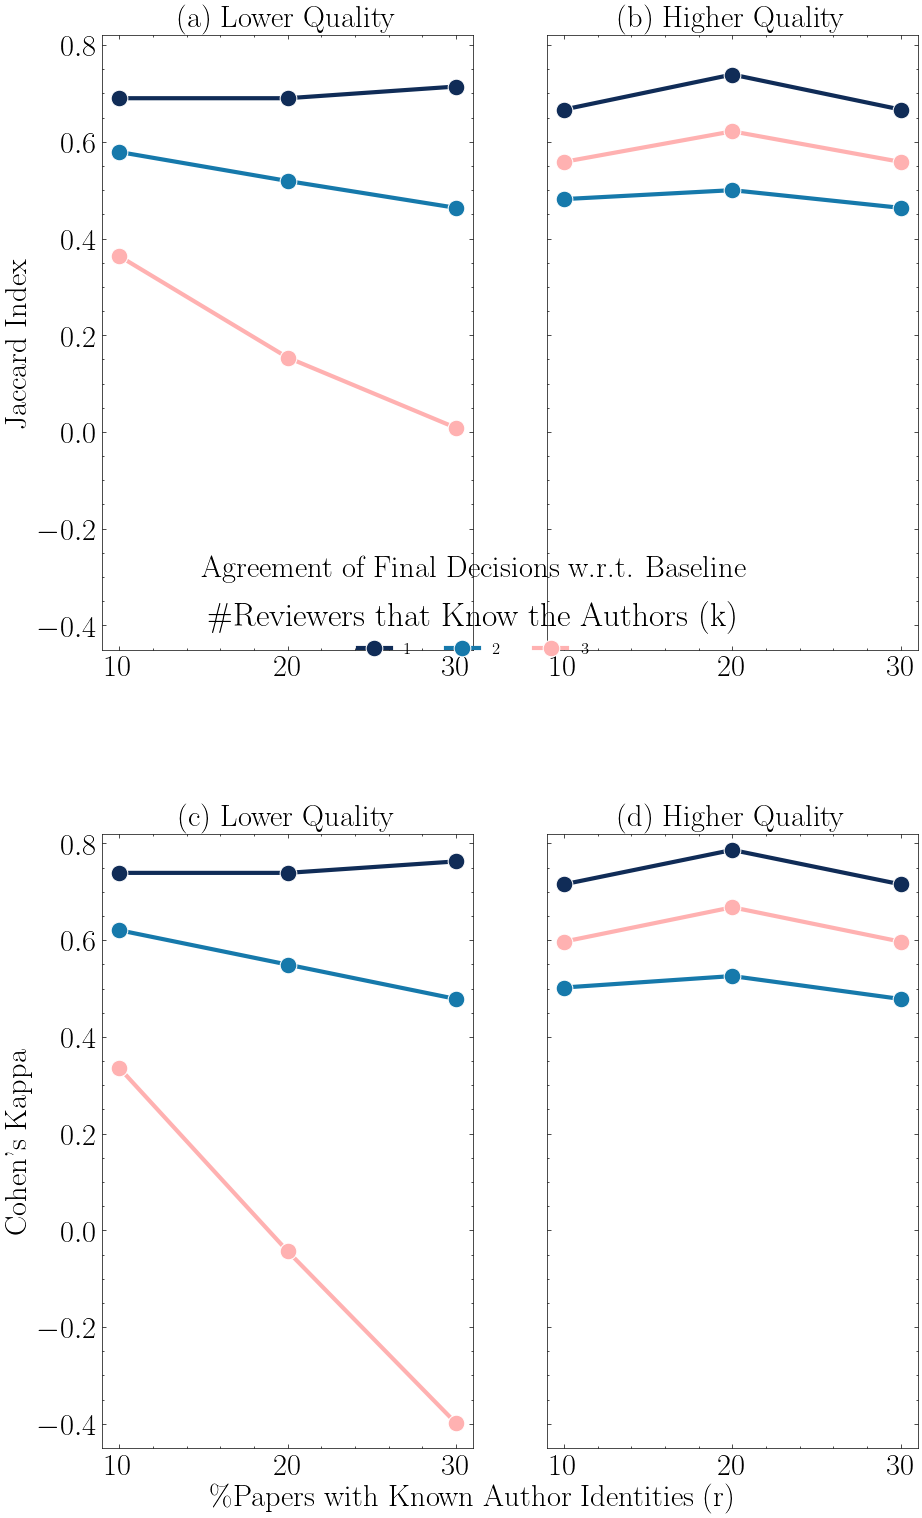

In [ ]:
FONT_SIZE = 22

# sns.set_style("whitegrid")

experiment_names = ["authors_are_famous_Rx1", "authors_are_famous_Rx2", "authors_are_famous_Rx3"]

results = pd.read_excel("ac_decision_metrics_known_authors.xlsx")


results.set_index("experiment_name", inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(9, 10), sharey=True)

metric_name2label = {
    "jacc": "Jaccard Index",
    "kappa": "Cohen's Kappa",
}

fig.suptitle(f'Agreement of Final Decisions w.r.t. Baseline', fontsize=FONT_SIZE)

idx_plot = 0

indices = "abcd"

for i, metric_name in enumerate(["jacc", "kappa"]):

    for j, ratio_of_accepted_papers in enumerate([0.0, 1.0]):
        df = results[results["ratio_accepted"] == ratio_of_accepted_papers]
        
        ax = axes[i][j]

        df["percentage_known_authors"] = df["percentage_known_authors"] * 100

        df = df.astype({
            # "ratio_accepted": str,
            "percentage_known_authors": int,
            "known_authors": str,
        })

        print(metric_name)
        print(df)

        sns.lineplot(data=df, x="percentage_known_authors", y=metric_name, hue="known_authors", marker='o',
                     markersize=12,
                     linewidth=3, ax=ax, 
                     palette=['#102C57', '#1679AB', '#FFB1B1']
                     )

        ax.set_xlabel("")
        ax.set_ylabel(metric_name2label[metric_name], fontsize=FONT_SIZE)

        # ax.set_xticks([10, 20, 30])

        # Set the size of the xticks and yticks
        ax.tick_params(axis='x', labelsize=FONT_SIZE)
        ax.tick_params(axis='y', labelsize=FONT_SIZE)

        # Customize the legend
        legend = ax.legend(title='#Reviewers that Know the Authors (k)', title_fontsize=15, fontsize=12)
        legend.remove()

        if ratio_of_accepted_papers == 1.0:
            ax.set_title(f"({indices[idx_plot]}) Higher Quality", fontsize=FONT_SIZE)

        elif ratio_of_accepted_papers == 0.0:
            ax.set_title(f"({indices[idx_plot]}) Lower Quality", fontsize=FONT_SIZE)

        if metric_name == "jacc":
            ax.set_ylim(0.0, 0.82)

        elif metric_name == "kappa":
            ax.set_ylim(-0.45, 0.82)

        else:
            raise ValueError(f"Unknown metric: {metric_name}")

        idx_plot += 1

# Add a common x-axis label
fig.text(0.5, 0.03, '\%Papers with Known Author Identities (r)', ha='center', fontsize=FONT_SIZE)

# Add a common legend
handles, labels = axes[0][0].get_legend_handles_labels()
legend = fig.legend(handles, labels, title='\#Reviewers that Know the Authors (k)', title_fontsize=24,
                    fontsize=12,
                    loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.95))

legend.get_frame().set_facecolor('none')  # Set transparent background
legend.get_frame().set_edgecolor('none')  # Remove border

# Adjust layout to make room for the common x-axis label and legend
fig.tight_layout(rect=[0, 0.05, 1, 0.88], pad=0.4, h_pad=0.5, w_pad=0.5)
fig.subplots_adjust(top=1.5, hspace=0.3, wspace=0.2)
plt.savefig(f"lineplot_known_authors.pdf", dpi=300, bbox_inches='tight')




### (V2) Lineplot for varying number of authors that know the author identities

/tmp/ipykernel_37/1381293132.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentage_known_authors"] = df["percentage_known_authors"] * 100
/tmp/ipykernel_37/1381293132.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["percentage_known_authors"] = df["percentage_known_authors"] * 100
jacc
                                           ratio_accepted  \
experiment_name                                             
authors_are_famous_Rx1_known0.1_accept0.0               0   
authors_are_famous_R

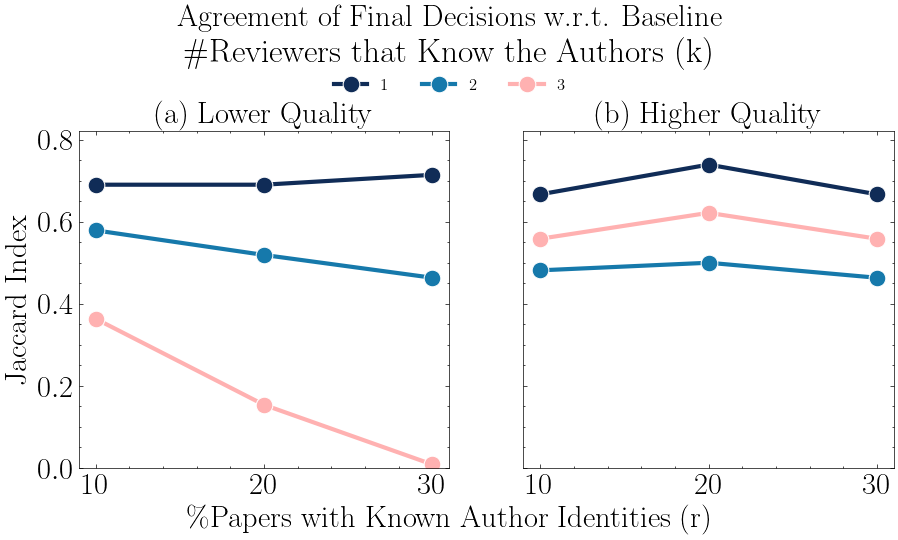

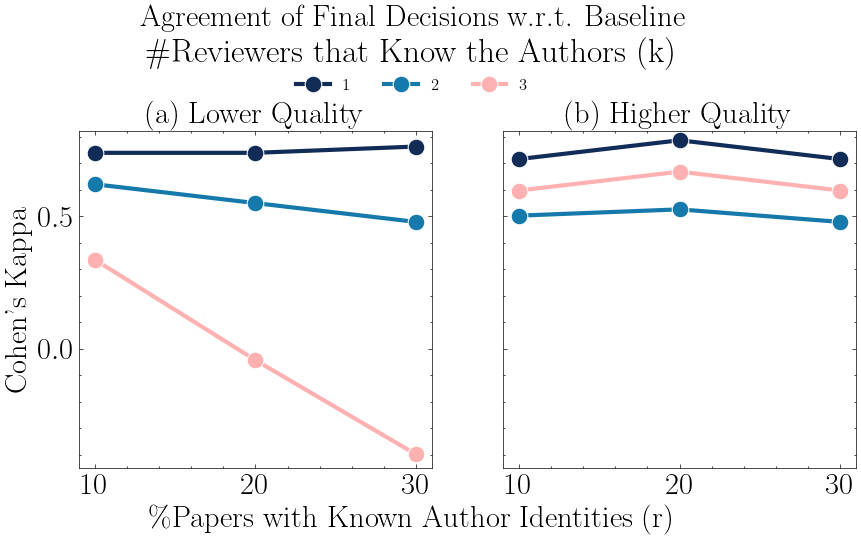

In [ ]:
FONT_SIZE = 22

# sns.set_style("whitegrid")

experiment_names = ["authors_are_famous_Rx1", "authors_are_famous_Rx2", "authors_are_famous_Rx3"]

results = pd.read_excel("ac_decision_metrics_known_authors.xlsx")


results.set_index("experiment_name", inplace=True)

metric_name2label = {
    "jacc": "Jaccard Index",
    "kappa": "Cohen's Kappa",
}

indices = "abcd"

for i, metric_name in enumerate(["jacc", "kappa"]):

    fig, axes = plt.subplots(1, 2, figsize=(9, 5.5), sharey=True)

    fig.suptitle(f'Agreement of Final Decisions w.r.t. Baseline', fontsize=FONT_SIZE)

    idx_plot = 0

    for j, ratio_of_accepted_papers in enumerate([0.0, 1.0]):
        df = results[results["ratio_accepted"] == ratio_of_accepted_papers]
        
        ax = axes[j]

        df["percentage_known_authors"] = df["percentage_known_authors"] * 100

        df = df.astype({
            # "ratio_accepted": str,
            "percentage_known_authors": int,
            "known_authors": str,
        })

        print(metric_name)
        print(df)

        sns.lineplot(data=df, x="percentage_known_authors", y=metric_name, hue="known_authors", marker='o',
                     markersize=12,
                     linewidth=3, ax=ax, 
                     palette=['#102C57', '#1679AB', '#FFB1B1']
                     )

        ax.set_xlabel("")
        ax.set_ylabel(metric_name2label[metric_name], fontsize=FONT_SIZE)

        # ax.set_xticks([10, 20, 30])

        # Set the size of the xticks and yticks
        ax.tick_params(axis='x', labelsize=FONT_SIZE)
        ax.tick_params(axis='y', labelsize=FONT_SIZE)

        # Customize the legend
        legend = ax.legend(title='#Reviewers that Know the Authors (k)', title_fontsize=15, fontsize=12)
        legend.remove()

        if ratio_of_accepted_papers == 1.0:
            ax.set_title(f"({indices[idx_plot]}) Higher Quality", fontsize=FONT_SIZE)

        elif ratio_of_accepted_papers == 0.0:
            ax.set_title(f"({indices[idx_plot]}) Lower Quality", fontsize=FONT_SIZE)

        if metric_name == "jacc":
            ax.set_ylim(0.0, 0.82)

        elif metric_name == "kappa":
            ax.set_ylim(-0.45, 0.82)

        else:
            raise ValueError(f"Unknown metric: {metric_name}")

        idx_plot += 1

    # Add a common x-axis label
    fig.text(0.5, 0.03, '\%Papers with Known Author Identities (r)', ha='center', fontsize=FONT_SIZE)

    # Add a common legend
    handles, labels = axes[0].get_legend_handles_labels()
    legend = fig.legend(handles, labels, title='\#Reviewers that Know the Authors (k)', title_fontsize=24,
                        fontsize=12,
                        loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.95))

    legend.get_frame().set_facecolor('none')  # Set transparent background
    legend.get_frame().set_edgecolor('none')  # Remove border

    # Adjust layout to make room for the common x-axis label and legend
    fig.tight_layout(rect=[0, 0.07, 1, 0.88], pad=0.4, h_pad=0.5, w_pad=0.5)  # Increase the 2nd parameter in rect to give more space to the legend
    fig.subplots_adjust(top=0.75, hspace=0.2, wspace=0.2)  # Lower the "top" parameter so that the plot is more squeezed
    plt.savefig(f"lineplot_known_authors_{metric_name}.pdf", dpi=300, bbox_inches='tight')




In [ ]:
FONT_SIZE = 22
df = pd.read_excel(osp.join("review_scores.xlsx"), index_col=0)
df.index.name = 'paper_id'

REVIEWER_TYPE = "irresponsible"  # Change this to "irresponsible" or "malicious"

# Prepare column names for both initial and updated scores
colnames = []
for initial_or_updated in ['initial', 'updated']:
    colnames += [f'BASELINE_avg_{initial_or_updated}'] + [f'{REVIEWER_TYPE}_Rx{i}_avg_{initial_or_updated}' for i in
                                                          range(1, 4)]

# Select the relevant columns and drop any rows with missing data
df = df[colnames].reset_index().dropna(axis=0, how='any')

# Melt the DataFrame to a long format
df_long = df.melt(id_vars='paper_id', value_vars=colnames)

# Split variable names into meaningful new columns
df_long['score_type'] = df_long['variable'].str.extract(r'(.*)_avg_(.*)')[1]
df_long['score_type'] = df_long['score_type'].map({
    'initial': 'Initial',
    'updated': 'Final'
})

df_long['num_reviewers'] = df_long['variable'].str.extract(r'(.*)_avg_(.*)')[0].map({
    'BASELINE': '0',
    f'{REVIEWER_TYPE}_Rx1': '1',
    f'{REVIEWER_TYPE}_Rx2': '2',
    f'{REVIEWER_TYPE}_Rx3': '3'
}).astype(str)  # Ensure num_reviewers is treated as categorical

# Plotting
plt.figure(figsize=(5, 6))
ax = sns.lineplot(data=df_long, x='num_reviewers', y='value', hue='score_type', style='score_type', markers=True,
              dashes=False, linewidth=3, markersize=10)
plt.title(f'Avg. Ratings by \# {REVIEWER_TYPE.capitalize()} Reviewers', fontsize=16)
plt.ylabel('Average Ratings', fontsize=FONT_SIZE)
plt.xlabel(f'\# {REVIEWER_TYPE.capitalize()} Reviewers', fontsize=FONT_SIZE)

# Set the size of the xticks and yticks
ax.tick_params(axis='x', labelsize=FONT_SIZE)
ax.tick_params(axis='y', labelsize=FONT_SIZE)

plt.legend(title='Score Type', fontsize=FONT_SIZE, title_fontsize=FONT_SIZE)

plt.ylim(3.2, 5.4)

plt.grid(True)
plt.tight_layout()
plt.savefig(osp.join(f'lineplot_known_author_identities.pdf'), dpi=300)
print("Done!")
# P

# Varying number of reviewers know authors' identities

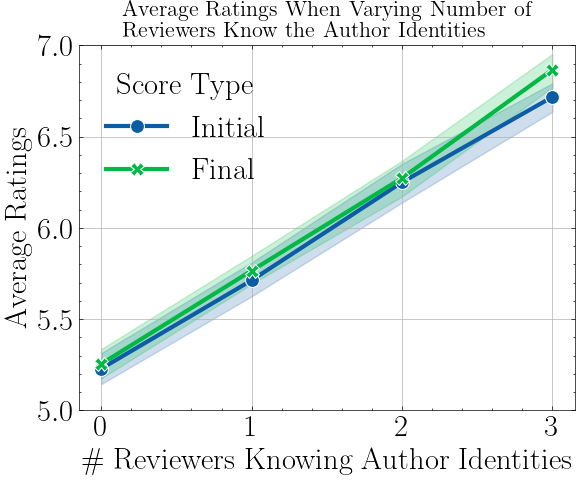

In [ ]:
FONT_SIZE = 22
df = pd.read_excel(osp.join("review_scores.xlsx"), index_col=0)
df.index.name = 'paper_id'

REVIEWER_TYPE = "authors_are_famous" 

# Prepare column names for both initial and updated scores
colnames = []
for initial_or_updated in ['initial', 'updated']:
    colnames += [f'BASELINE_avg_{initial_or_updated}'] + [f'{REVIEWER_TYPE}_Rx{i}_avg_{initial_or_updated}' for i in
                                                          range(1, 4)]

# Select the relevant columns and drop any rows with missing data
df = df[colnames].reset_index().dropna(axis=0, how='any')


# Melt the DataFrame to a long format
df_long = df.melt(id_vars='paper_id', value_vars=colnames)

# Split variable names into meaningful new columns
df_long['score_type'] = df_long['variable'].str.extract(r'(.*)_avg_(.*)')[1]
df_long['score_type'] = df_long['score_type'].map({
    'initial': 'Initial',
    'updated': 'Final'
})

df_long['num_reviewers'] = df_long['variable'].str.extract(r'(.*)_avg_(.*)')[0].map({
    'BASELINE': '0',
    f'{REVIEWER_TYPE}_Rx1': '1',
    f'{REVIEWER_TYPE}_Rx2': '2',
    f'{REVIEWER_TYPE}_Rx3': '3'
}).astype(str)  # Ensure num_reviewers is treated as categorical

# Plotting
plt.figure(figsize=(6, 5)) # Adjust the plot size so that we put this into appendix and take the full row
ax = sns.lineplot(data=df_long, x='num_reviewers', y='value', hue='score_type', style='score_type', markers=True,
              dashes=False, linewidth=3, markersize=10)
plt.title(f'Average Ratings When Varying Number of\n Reviewers Know the Author Identities', fontsize=16)
plt.ylabel('Average Ratings', fontsize=FONT_SIZE)
plt.xlabel(f'\# Reviewers Knowing Author Identities', fontsize=FONT_SIZE)

# Set the size of the xticks and yticks
ax.tick_params(axis='x', labelsize=FONT_SIZE)
ax.tick_params(axis='y', labelsize=FONT_SIZE)

plt.legend(title='Score Type', fontsize=FONT_SIZE, title_fontsize=FONT_SIZE)

plt.ylim(5.0, 7.0)

plt.grid(True)
plt.tight_layout()
plt.savefig(osp.join(f'lineplot_{REVIEWER_TYPE}.pdf'), dpi=300)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34bbb3e4-63c3-48b7-83bd-85fd642ee383' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>